## Q3: Modelling Assesment
Dorota Gawrońska-Popa

For this task use the Bank Marketing dataset available on the following address:
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Build 2 binary classification models using any 2 of the following methods (in R or Python):
1. Logistic Regression
2. Random Forest
3. GBM
4. Xgboost
5. Neural Network

Try and minimalize overfitting. Compare the performance of both models using ROC graphs, AUCs, confusion matrices.

Provide also the full source code and description of any variable transformations or balancing performed.

### Data Set Information
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

### Purpose of the project 
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### What is a Term Deposit?
With a term deposit, you lock away an amount of money for an agreed length of time (the ‘term’) – that means you can’t access the money until the term is up. In return, you’ll get a guaranteed rate of interest for the term you select, so you’ll know exactly what the return on your money will be.

For more information please click:
<a href="https://www.westpac.com.au/personal-banking/bank-accounts/term-deposit/savings-vs-term-deposit/">What’s the difference between a term deposit and a savings account?</a>

### Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import preprocessing
# import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# from scipy import stats
# from scipy.stats import zscore
# from scipy.stats import ttest_1samp
# from scipy.stats import ttest_ind
# from scipy.stats import f_oneway
# from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import xgboost as xgb 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor)
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, recall_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import random
import imblearn
from imblearn.under_sampling import RandomUnderSampler

### Attribute Information:

### Input variables:
#### bank client data:
1. **age** (numeric)
2. **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default:** has credit in default? (categorical: 'no','yes','unknown')
6. **housing:** has housing loan? (categorical: 'no','yes','unknown')
7. **loan:** has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8. **contact:** contact communication type (categorical: 'cellular','telephone') 
9. **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12. **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous:** number of contacts performed before this campaign and for this client (numeric)
15. **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16. **emp.var.rate:** employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx:** consumer price index - monthly indicator (numeric) 
18. **cons.conf.idx:** consumer confidence index - monthly indicator (numeric) 
19. **euribor3m:** euribor 3 month rate - daily indicator (numeric)
20. **nr.employed:** number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')

Sources: <a href="http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#">Bank Marketing dataset</a>

### Data Processing

In [2]:
data = pd.read_csv('bank-additional-full.csv', delimiter = ';', low_memory = False)
data = data.rename(columns={'y':'deposit'})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.shape

(41188, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are no missing values in the dataset, which is definitely easier. If there were missing values, then one would wonder whether to fill them in with the median, mean or mode. 

In [5]:
data['deposit'].value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

In [6]:
y_yes = (len(data)/len(data[data['deposit'] == 'yes'])/100)
percentage = "{:.2%}".format(y_yes)
print('The proportion of positive deposits to total is only: ' + percentage)

The proportion of positive deposits to total is only: 8.88%


#### Summary:
- In the **Age** column, we see that there is a very large spread between the ages of bank customers. The oldest is 95 years old and the youngest is only .... The average age is 41 years. 

- As stated in the data information, an interesting feature is **duration**.  On the one hand we will see a high correlation between the time of the phone call and the purchase of a term deposit, on the other hand if the bank and the customer did not talk on the phone, then the time of the call = 0 and this variable is not useful. Therefore, as suggested in the description, we will remove this variable so that it does not erroneously affect the model. 

- It is important that half of the data is **numerical** and the other half **categorical**. We will need to perform encoding of the categorical data to bring it into the model. 

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### EDA Explorary Data Analysis and Feature engineering 

In this part I would like to display some relations between dependent values and independent value. I will show how numeric and categorical data is distributed. I gona cfreate new features and probably drop others. 

### Numerical Features

age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

#### Atribute - Age

In [8]:
data['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

In [9]:
data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

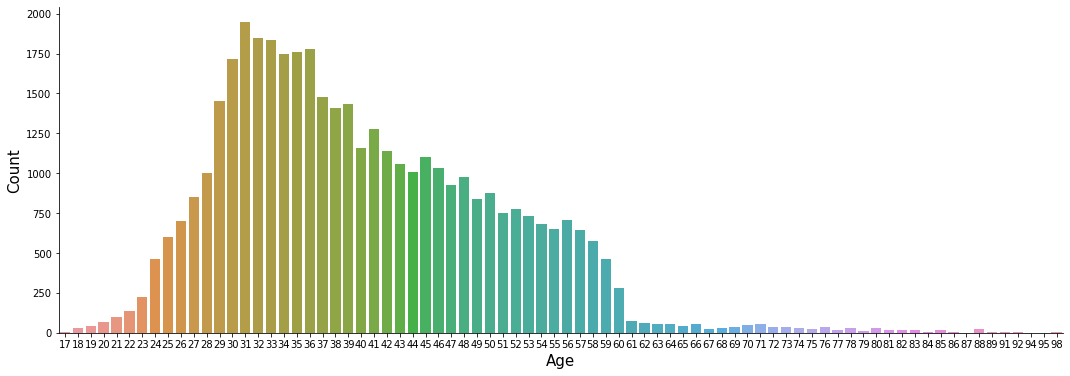

In [10]:
fig = plt.figure(figsize = (18,6))

ax = sns.countplot(x ='age', data = data)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
sns.despine()

Text(0.5, 1.0, 'Relation between Age and Subscription a Term Deposit')

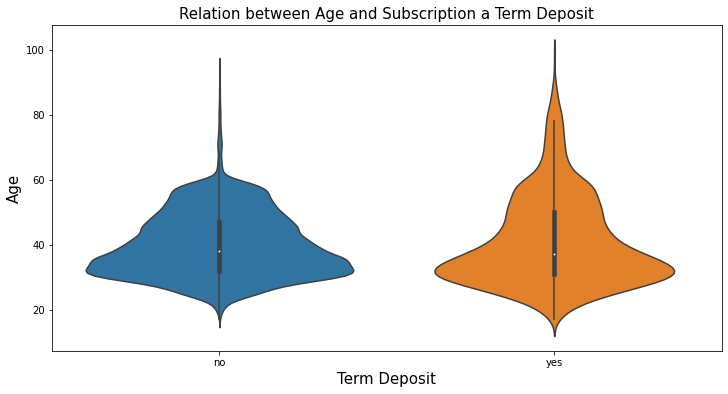

In [11]:
fig = plt.figure(figsize = (12,6))

ax = sns.violinplot(data=data, x = "deposit", y = "age")
plt.xlabel("Term Deposit", fontsize = 15)
plt.ylabel("Age", fontsize = 15)
plt.title("Relation between Age and Subscription a Term Deposit", fontsize = 15)

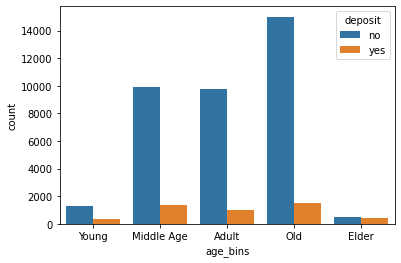

In [12]:
data["age_bins"]=pd.cut(data.age, bins=[17,25,33,40,60,99],labels=['Young','Middle Age', 'Adult', 'Old','Elder'])
sns.countplot(x="age_bins",data=data, hue="deposit")
plt.show()

**Conclusion**

I decided to split date for 5 groups and add new columns in dataset. For customers younger than 24 and older than 59, the number of time deposit purchases decreases significantly. It is likely that the age attribute will be highly significant in the model.

#### Atribute - Duration

In [13]:
data['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

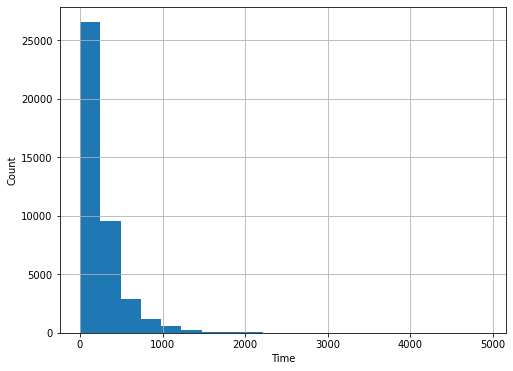

In [14]:
data['duration'].hist(bins=20, figsize=(8,6))
plt.xlabel("Time", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

In [15]:
data[data['duration'] < 360].count()

age               32618
job               32618
marital           32618
education         32618
default           32618
housing           32618
loan              32618
contact           32618
month             32618
day_of_week       32618
duration          32618
campaign          32618
pdays             32618
previous          32618
poutcome          32618
emp.var.rate      32618
cons.price.idx    32618
cons.conf.idx     32618
euribor3m         32618
nr.employed       32618
deposit           32618
age_bins          32616
dtype: int64

**Conclusion**

The histogram is right-skewed. Most are short conversations or conversations that did not take place. It is not possible to tell if the absence of a conversation will affect the model. 
The median value of this attribute is only 180 seconds and the maximum value is 82 minutes. 
The majority of calls, 32618, lasted only 3 minutes. 

This variety will be **drop** from dataset. 

#### Atribute - Campaign

In [16]:
data['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

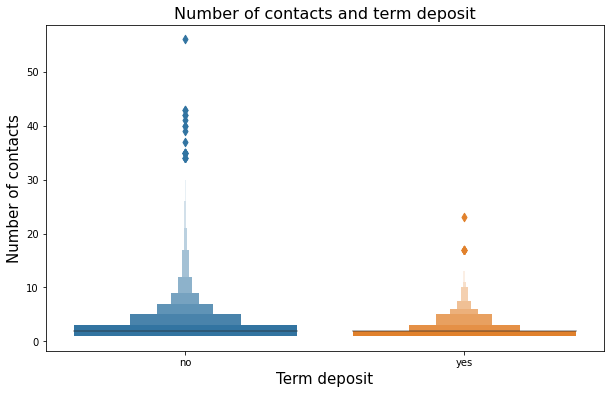

In [17]:
plt.figure(figsize = (10,6))
ax = sns.boxenplot(x="deposit", y= "campaign", data=data)
plt.xlabel("Term deposit",fontsize=15)
plt.ylabel("Number of contacts",fontsize=15)
plt.title("Number of contacts and term deposit", fontsize=16)
plt.show()

In [18]:
data[['campaign','deposit']].nlargest(10,"campaign")

,campaign,deposit
4107,56,no
13447,43,no
18728,43,no
4168,42,no
5304,42,no
11033,41,no
11769,40,no
18754,40,no
4114,39,no
11593,37,no


In [19]:
data[data['campaign'] > 10].count()

age               869
job               869
marital           869
education         869
default           869
housing           869
loan              869
contact           869
month             869
day_of_week       869
duration          869
campaign          869
pdays             869
previous          869
poutcome          869
emp.var.rate      869
cons.price.idx    869
cons.conf.idx     869
euribor3m         869
nr.employed       869
deposit           869
age_bins          869
dtype: int64

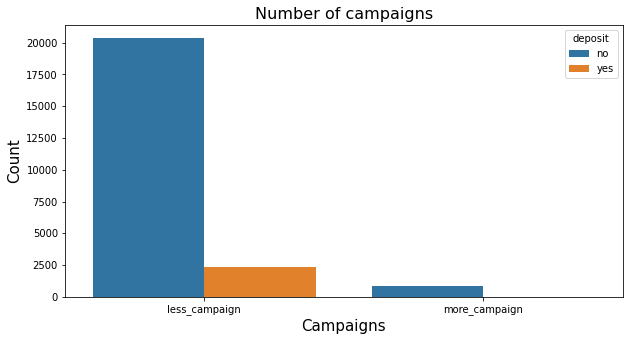

In [20]:
plt.figure(figsize=(10,5))
data['campaign_bins'] = pd.cut(x=data['campaign'], bins = [1,10,56], labels = ['less_campaign','more_campaign'])

sns.countplot(x="campaign_bins", hue="deposit",data=data)
plt.title("Number of campaigns", fontsize=16)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Campaigns",fontsize=15)
plt.show()

**Conclusion**

The campaign attribute has many outliers. Although the average number of customer contacts is around 2.57, the maximum is 56 and minutes is 1. 
I do not have enough data to determine whether this was an intentional action on the part of the bank, as the company used aggressive forms of marketing. Or was it human error and unnecessary phone calls made. On the other hand, it should probably be clear after reaching a person 10 times whether they are interested in the product or not. 

I decided to split the campaign data into two groups: those with < 10 phone contacts and those above. I create new column **campaign_bins**.

#### Atribute - Pdays

In [21]:
data[['pdays']].describe()

,pdays
count,41188.000000
mean,962.475454
std,186.910907
min,0.000000
25%,999.000000
50%,999.000000
75%,999.000000
max,999.000000


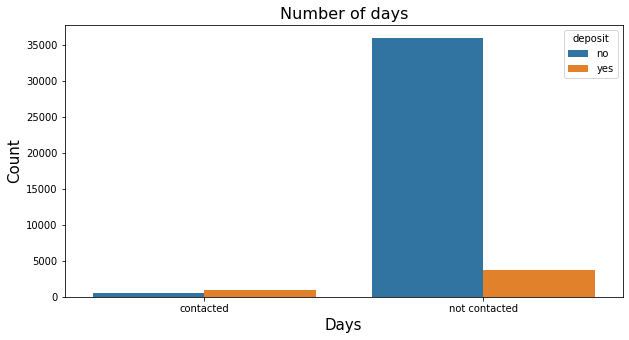

In [22]:
plt.figure(figsize=(10,5))
data['pdays_bins'] = pd.cut(x=data['pdays'], bins = 2, labels = ['contacted','not contacted'])

sns.countplot(x="pdays_bins", hue="deposit",data=data)
plt.xlabel("Days",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Number of days", fontsize=16)
plt.show()

In [23]:
data[data['pdays'] == 999].count()

age               39673
job               39673
marital           39673
education         39673
default           39673
housing           39673
loan              39673
contact           39673
month             39673
day_of_week       39673
duration          39673
campaign          39673
pdays             39673
previous          39673
poutcome          39673
emp.var.rate      39673
cons.price.idx    39673
cons.conf.idx     39673
euribor3m         39673
nr.employed       39673
deposit           39673
age_bins          39671
campaign_bins     22828
pdays_bins        39673
dtype: int64

**Conclusion**

There are as many as 39673 records in the data that have a value of pdays = 999, indicating no bank contact with the customer on the previous campaign. I divided the data into two categories 'contanted' and 'not contacted', and also add new column **pdays_bins**.

#### Atribute - Previous

In [24]:
data[['previous']].describe()

,previous
count,41188.000000
mean,0.172963
std,0.494901
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.000000


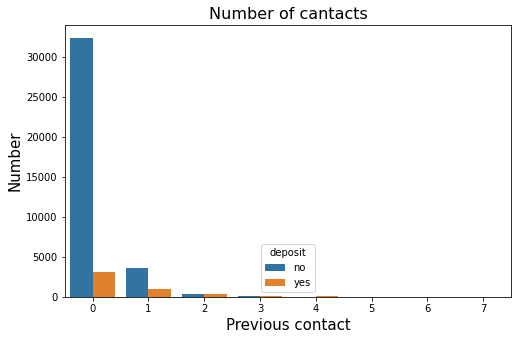

In [25]:
plt.figure(figsize=(8,5))

sns.countplot(x="previous", hue="deposit", data=data)
plt.xlabel("Previous contact",fontsize=15)
plt.ylabel("Number",fontsize=15)
plt.title("Number of cantacts", fontsize=16)
plt.show()

#### Social end economic context atributes

In [26]:
data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:xlabel='deposit', ylabel='nr.employed'>

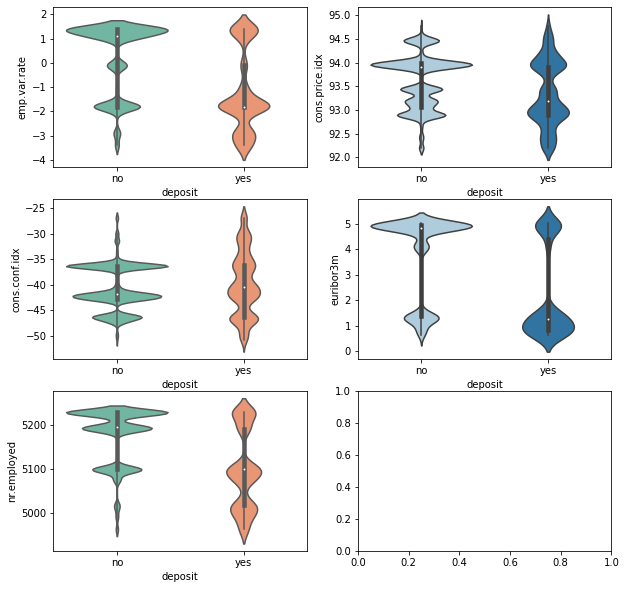

In [27]:
fig,axes = plt.subplots(3,2, figsize=(10,10))

sns.violinplot(y="emp.var.rate", x="deposit", data=data, ax=axes[0][0], palette="Set2")
sns.violinplot(y="cons.price.idx", x="deposit", data=data, ax=axes[0][1], palette="Paired")
sns.violinplot(y="cons.conf.idx", x="deposit", data=data, ax=axes[1][0], palette="Set2")
sns.violinplot(y="euribor3m", x="deposit", data=data, ax=axes[1][1], palette="Paired")
sns.violinplot(y="nr.employed", x="deposit", data=data, ax=axes[2][0], palette="Set2")

### Target Deposit - encoding

In [28]:
le = LabelEncoder()
data['deposit'] = le.fit_transform(data['deposit'].astype(str)) 
data['deposit'].value_counts()

0    36548
1     4640
Name: deposit, dtype: int64

### Categorical Features

job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome

#### Graphic reprezentation of all categorical atributes

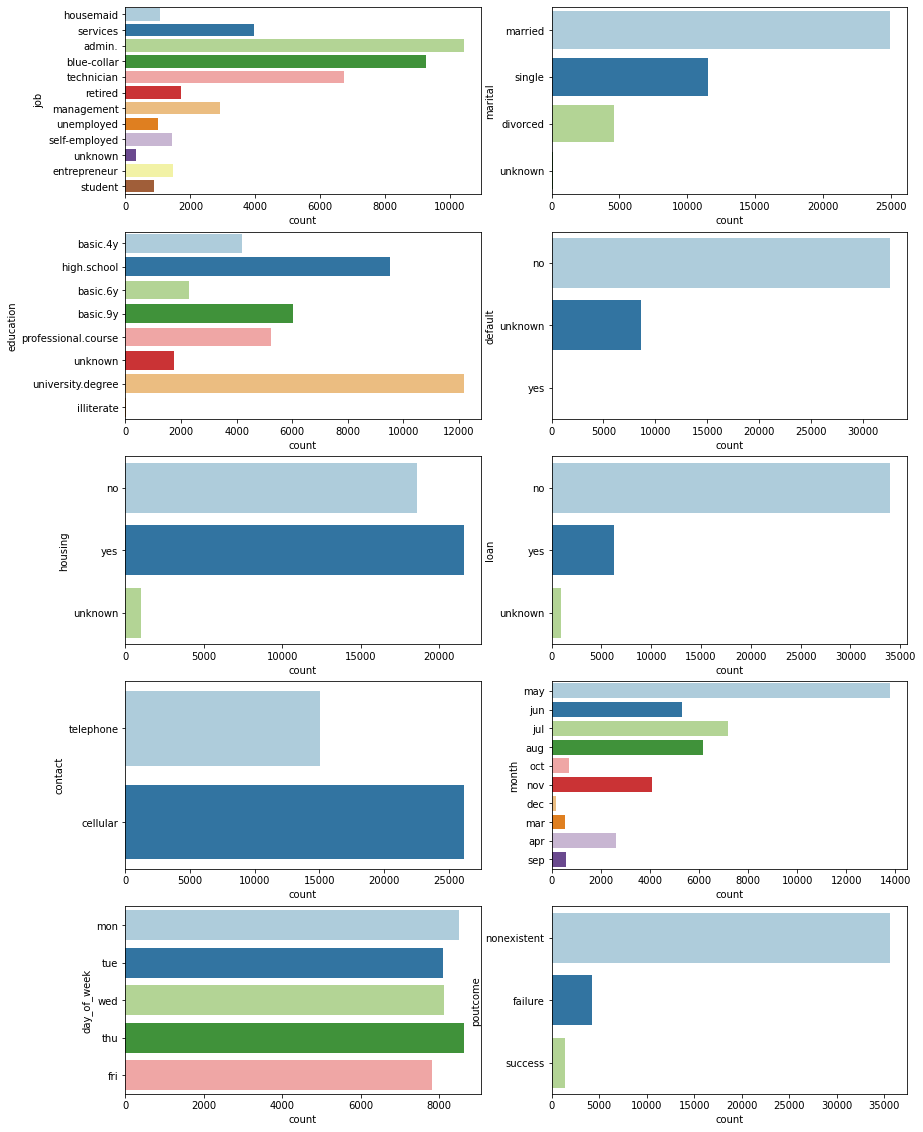

In [29]:
fig, ax = plt.subplots(5, 2, figsize=(14, 20))
sns.countplot(y = data['job'], ax=ax[0][0], palette='Paired')
sns.countplot(y = data['marital'], ax=ax[0][1], palette='Paired')
sns.countplot(y = data['education'], ax=ax[1][0], palette='Paired')
sns.countplot(y = data['default'], ax=ax[1][1], palette='Paired')
sns.countplot(y = data['housing'], ax=ax[2][0], palette='Paired')
sns.countplot(y = data['loan'], ax=ax[2][1], palette='Paired')
sns.countplot(y = data['contact'], ax=ax[3][0], palette='Paired')
sns.countplot(y = data['month'], ax=ax[3][1], palette='Paired')
sns.countplot(y = data['day_of_week'], ax=ax[4][0], palette='Paired')
sns.countplot(y = data['poutcome'], ax=ax[4][1], palette='Paired')
plt.show()

**Conclusion**

It is interesting to note that the highest number of calls to customers occurs in the spring and summer months, and the weakest in the colder months.
The 'poutcome' variable reflects the response to the previous campaign. As can be seen, most of the campaigns target customers where this variable has a nonexistent value. 

As can be seen from the distributions, the campaign mainly targeted the middle class, the married, the upper and middle educated, and those with no credit. 

### Correlations

The correlation is possible only for numerical variable. A correlation is a statistical measure of the relationship between two variables. The measure is best used in variables that demonstrate a linear relationship between each other.

In [30]:
corr = data.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


Text(0.5, 1.0, 'Correlation between atributes')

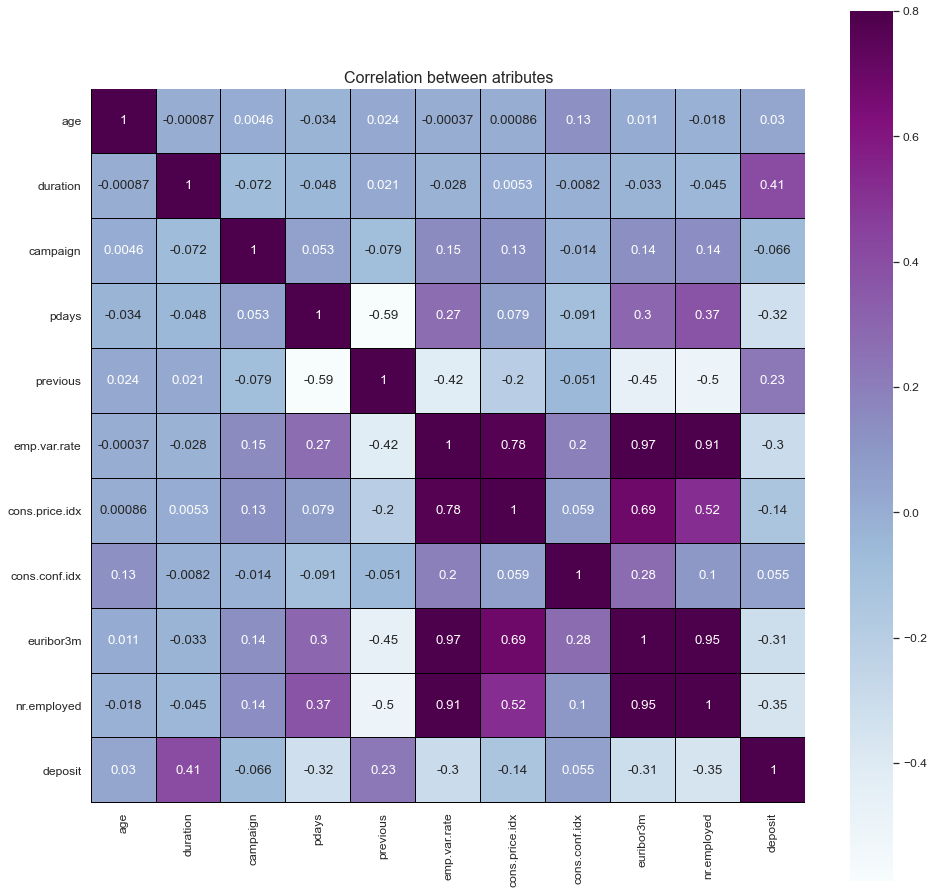

In [31]:
sns.set(font_scale=1.1)
plt.figure(figsize=(16, 16))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap="BuPu", linecolor="black")
plt.title('Correlation between atributes', fontsize=16)

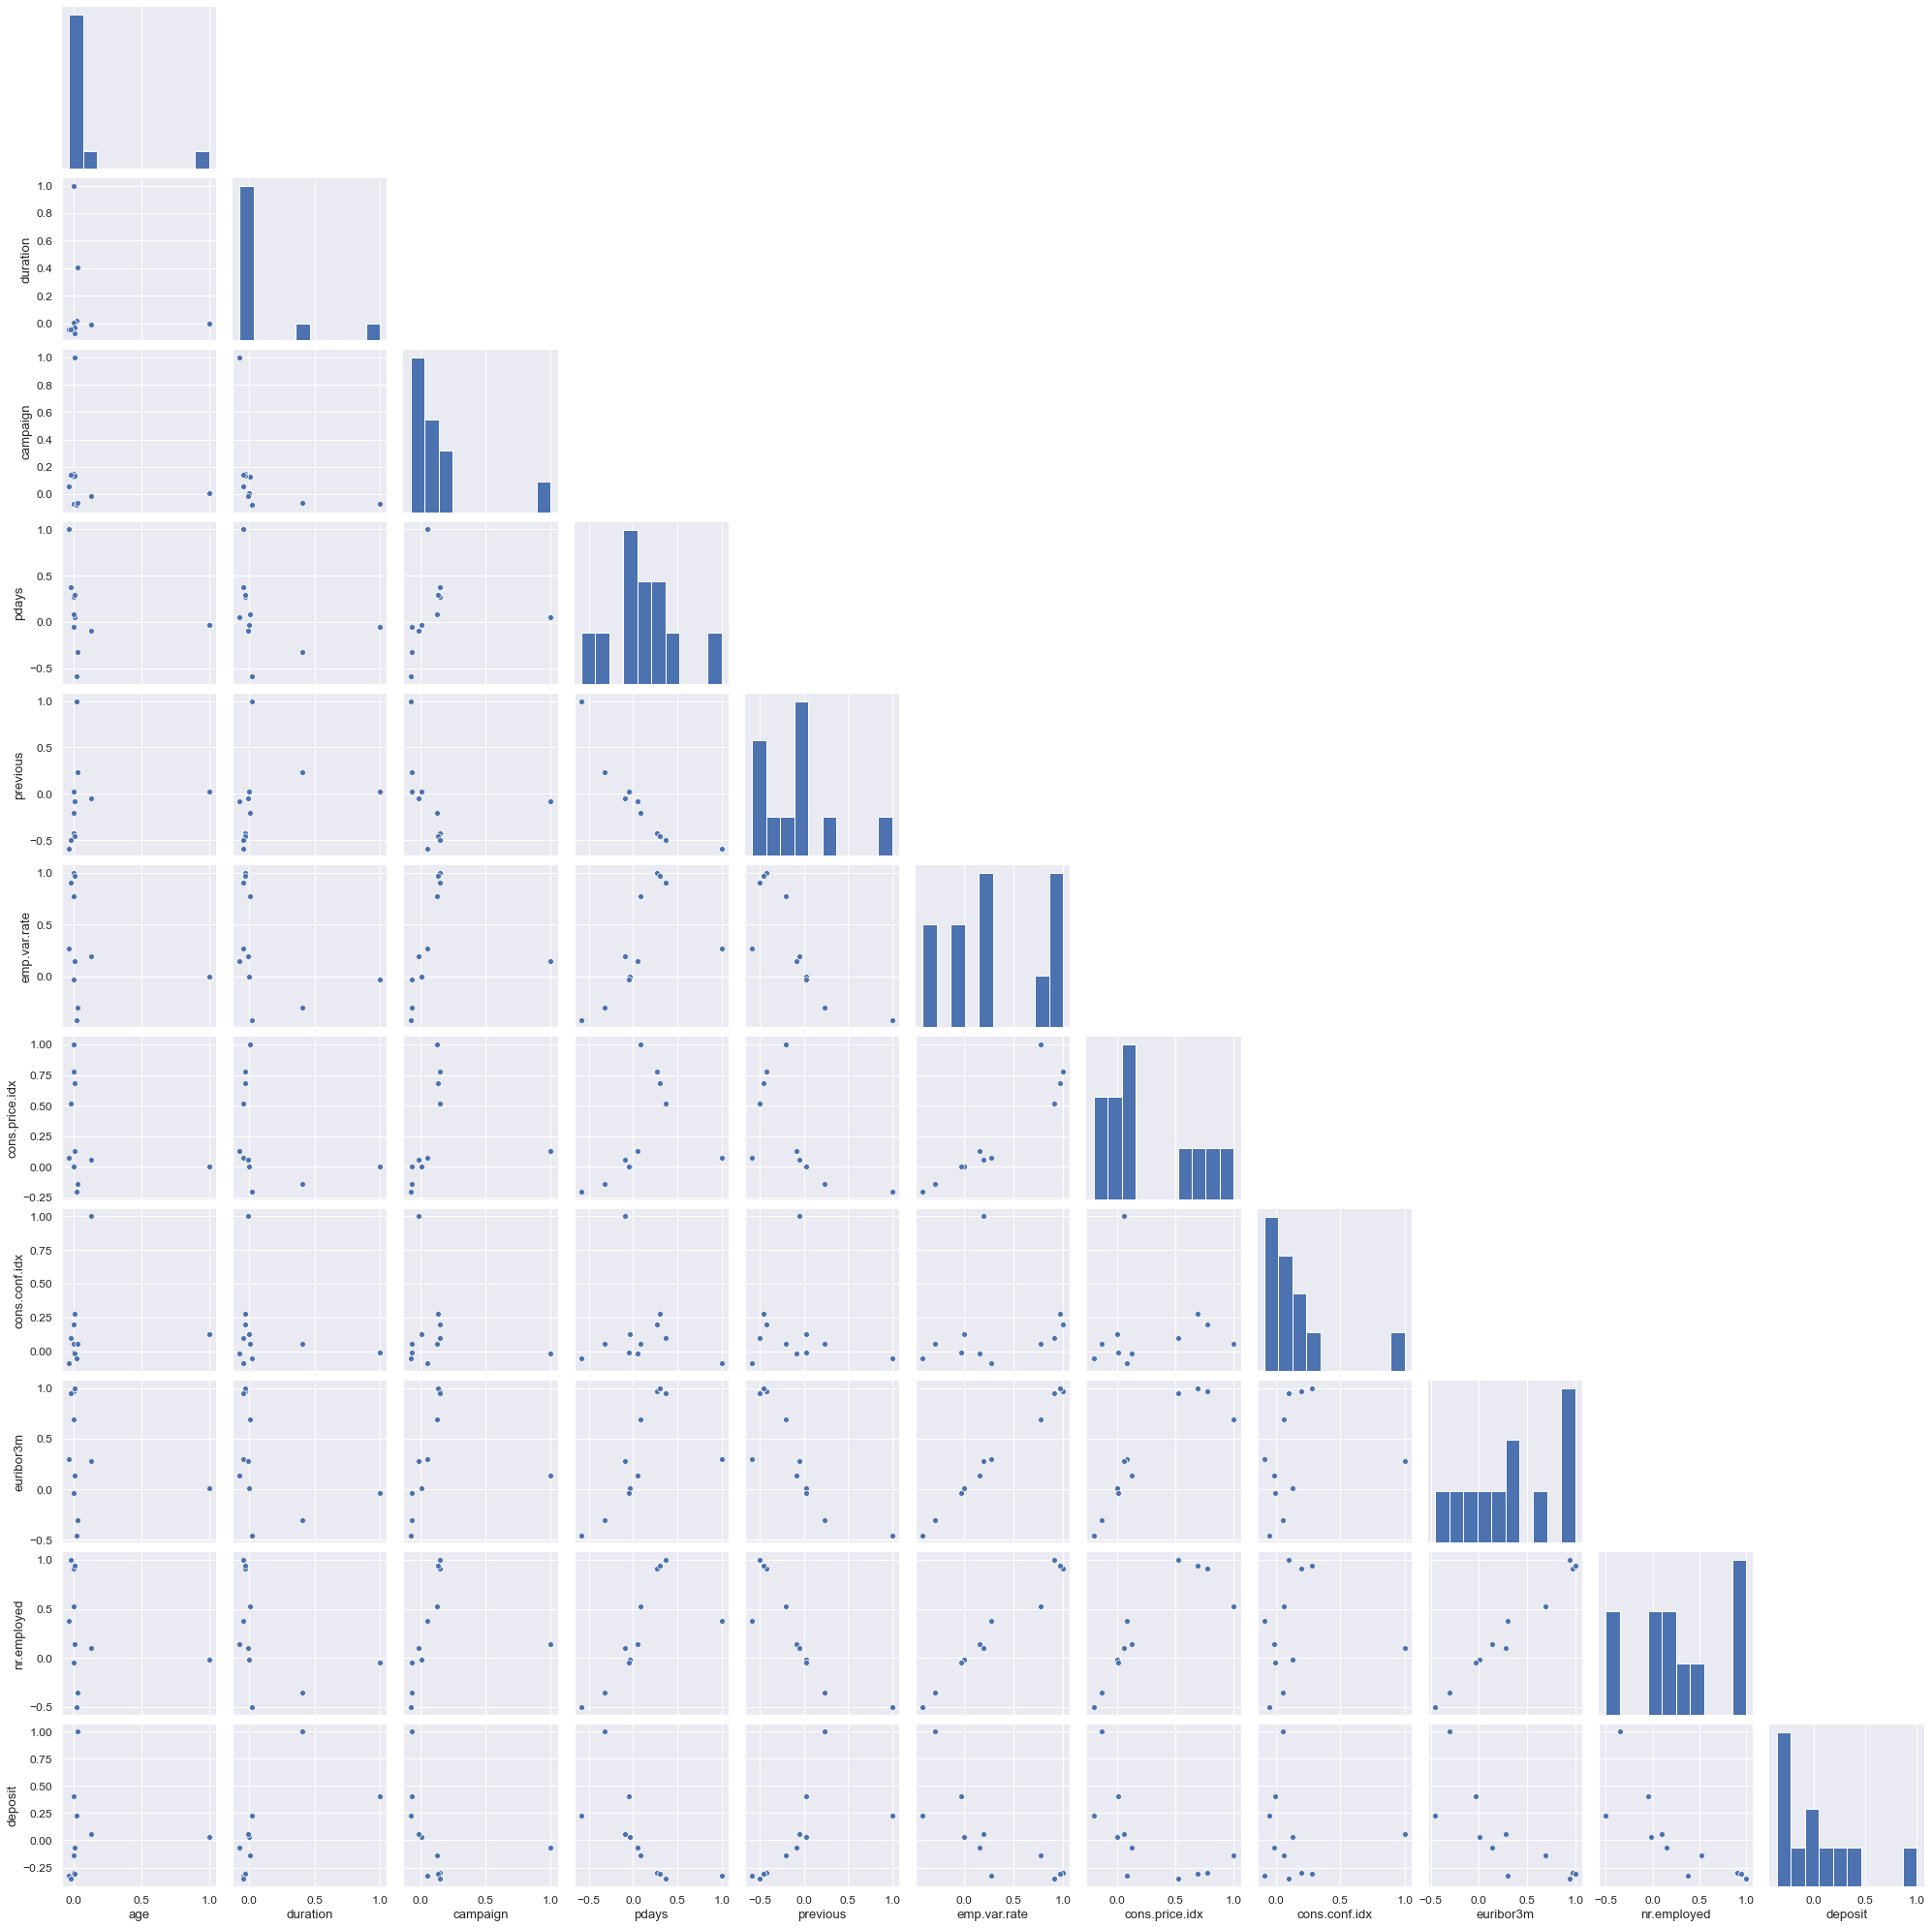

In [32]:
sns.pairplot(corr, corner = True, palette="husl")

**Conclusion**

In the Heat Map we see 4 atributes with high correlation between themselfs. These columns are **cons.price.idx, euribor3m, nr.employed, emp.var.rate**. Therefore we applied the factor analysis method and created a new column called **factor**. After this process we dropped these columns.

In [33]:
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(n_components=1, random_state=0)
data['factor'] = transformer.fit_transform(data[['cons.price.idx', 'euribor3m', 'nr.employed', 'emp.var.rate']])

data.drop(['cons.price.idx', 'euribor3m', 'nr.employed', 'emp.var.rate'], axis = 1, inplace = True )
data

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_factor_analysis.py:253: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,cons.conf.idx,deposit,age_bins,campaign_bins,pdays_bins,factor
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,-36.4,0,Old,NaN,not contacted,-0.709946
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,-36.4,0,Old,NaN,not contacted,-0.709946
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,-36.4,0,Adult,NaN,not contacted,-0.709946
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,-36.4,0,Adult,NaN,not contacted,-0.709946
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,-36.4,0,Old,NaN,not contacted,-0.709946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-50.8,1,Elder,NaN,not contacted,1.491967
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-50.8,0,Old,NaN,not contacted,1.491967
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-50.8,0,Old,less_campaign,not contacted,1.491967
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-50.8,1,Old,NaN,not contacted,1.491967


#### One-Hot Encoding

To convert our categorical features to numbers, we will use a technique called **one-hot encoding**. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise.

Before one-hot I drop a column 'duration', 'age', 'campaign', 'pdays'.

In [34]:
data.drop(['duration', 'age', 'campaign', 'pdays' ], 1, inplace = True)

In [35]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,previous,cons.conf.idx,deposit,factor,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,poutcome_success,age_bins_Young,age_bins_Middle Age,age_bins_Adult,age_bins_Old,age_bins_Elder,campaign_bins_less_campaign,campaign_bins_more_campaign,pdays_bins_contacted,pdays_bins_not contacted
0,0,-36.4,0,-0.709946,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,-36.4,0,-0.709946,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-36.4,0,-0.709946,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,-36.4,0,-0.709946,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,-36.4,0,-0.709946,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [36]:
data_dummies.columns

Index(['previous', 'cons.conf.idx', 'deposit', 'factor', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       

In [37]:
data_dummies.shape

(41188, 66)

In [38]:
data_dummies.isnull().any().any()

False

## Modelling

Below are a few functions to streamline our modeling.

## Train-Test Data Split

In [39]:
X = data_dummies.drop('deposit',axis=1) 
#target
y = data_dummies['deposit']

In [40]:
sampler = RandomUnderSampler(random_state = 67)

X_sampled, y_sampled = sampler.fit_resample(X, y)
pd.Series(y_sampled).value_counts().to_frame()

,deposit
1,4640
0,4640


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 71)

## Standariziation

In [54]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.35150138, -0.28529813, -0.77573445, ..., -0.14516332,
        -0.19841108,  0.19841108],
       [-0.35150138, -0.47973844, -0.77719712, ..., -0.14516332,
        -0.19841108,  0.19841108],
       [-0.35150138, -0.28529813, -0.72256663, ..., -0.14516332,
        -0.19841108,  0.19841108],
       ...,
       [-0.35150138, -0.28529813, -0.77516883, ..., -0.14516332,
        -0.19841108,  0.19841108],
       [-0.35150138, -1.23589523,  1.33509996, ..., -0.14516332,
        -0.19841108,  0.19841108],
       [-0.35150138, -0.28529813, -0.77516883, ...,  6.88879251,
        -0.19841108,  0.19841108]])

### Logistic Regression

In [55]:
log = LogisticRegression(penalty='l2', solver='liblinear')
log.fit(X_train, y_train)

log_pred = log.predict(X_test)
    
# Summary of the prediction
print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

# Accuracy
print('Training accuracy: %.4f' % log.score(X_train, y_train))
print('Test accuracy: %.4f' % log.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10962
           1       0.64      0.21      0.32      1395

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357

[[10796   166]
 [ 1100   295]]
Training accuracy: 0.8988
Test accuracy: 0.8975


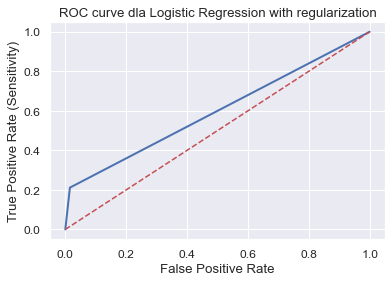

AUROC = 0.7737



In [56]:
fpr, tpr, thresholds = roc_curve(y_test, log_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'r--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve dla Logistic Regression with regularization')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
auroc_lrc = roc_auc_score(log_pred,y_test)
print('AUROC = %.4f' % auroc_lrc)
print('')

### Logistic Regression with regularization 

In [57]:
C = [10, .1, .01, .001]

for c in C:
    log1 = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    log1.fit(X_train, y_train)
    
    log1_pred = log1.predict(X_test)
    
    # Summary of the prediction
    print(classification_report(y_test, log1_pred))
    print(confusion_matrix(y_test, log1_pred))
    print('')
    print('C:', c)
    # Accuracy
    # print('Coefficient of each feature:', log1.coef_)
    print('Training accuracy: %.4f' % log1.score(X_train, y_train))
    print('Test accuracy: %.4f' % log1.score(X_test, y_test))
    print('')
    auroc_lrc = roc_auc_score(log1_pred,y_test)
    print('AUROC = %.4f' % auroc_lrc)
    print('')

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10962
           1       0.64      0.21      0.32      1395

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357

[[10797   165]
 [ 1100   295]]

C: 10
Training accuracy: 0.8988
Test accuracy: 0.8976

AUROC = 0.7744

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10962
           1       0.64      0.21      0.32      1395

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357

[[10799   163]
 [ 1102   293]]

C: 0.1
Training accuracy: 0.8990
Test accuracy: 0.8976

AUROC = 0.7750

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10962
           1       0.69      0

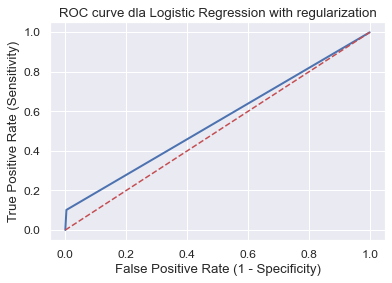

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, log1_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'r--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve dla Logistic Regression with regularization')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### XGB Classifier

In [59]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [60]:
xgb_clas=xgb.XGBClassifier(random_state=67,learning_rate=0.01)
xgb_clas.fit(X_train, y_train)
xgb_clas_prediction = xgb_clas.predict(X_test)
xgb_clas = evaluate(xgb_clas_prediction,y_test)
xgb_clas

# Summary of the prediction
print(classification_report(y_test, xgb_clas_prediction))
print(confusion_matrix(y_test, xgb_clas_prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10962
           1       0.65      0.25      0.36      1395

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357

[[10774   188]
 [ 1053   342]]


In [61]:
auroc_xgb_clas = roc_auc_score(xgb_clas_prediction,y_test)
print('AUROC = %.4f' % auroc_xgb_clas)

AUROC = 0.7781


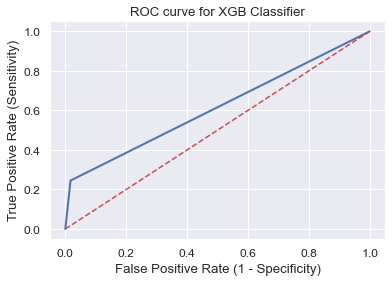

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_clas_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'r--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for XGB Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Learning Curve for Logistic Regression with c = 0.001

In [63]:
## Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :param train_sizes:
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

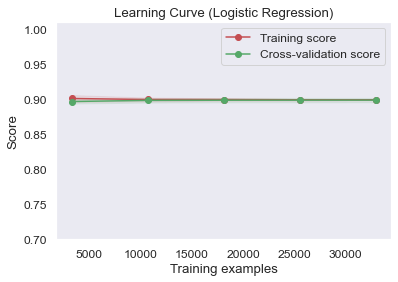

In [64]:
# Shuffle for learning curves
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(log, 'Learning Curve (Logistic Regression)', X, y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

In [65]:
import pickle

# save the model to disk
log1_final_model = 'finalized_model.sav'
pickle.dump(log1, open(log1_final_model, 'wb'))